In [1]:
import json
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from pymongo import MongoClient

In [2]:
client = MongoClient(
    'mongodb://localhost:27017/',
    username='mongoadmin',
    password='pass',
    authSource='admin'
)

db = client.geodata
lpis = db.lpis

# Delete all data
lpis.delete_many({})
lpis.count_documents({})

0

In [3]:
# Load all fueatures to MongoDB
with open('shapes/kulturne_diely.geojson', 'r') as file:
    file_data = file.read()

json_data = json.loads(file_data)  
# print(json_data['type'])
# print(json_data['name'])

culture_areas = json_data['features']
result = lpis.insert_many(culture_areas)
print(result)

0    True
dtype: bool

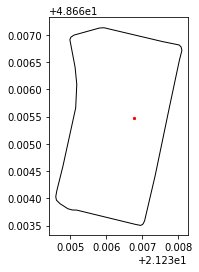

In [5]:
fig, ax = plt.subplots()

# Get area from database
result = lpis.find_one({'properties.LOKALITA': 'Poľov', 'properties.ZKODKD': '4503/1'})
polov = GeoDataFrame.from_features([result], crs="ESRI:102067")
polov_epsg = polov.to_crs(epsg=4326)
polov_epsg.plot(ax=ax, color='white', edgecolor='black')

# Create point from standard coordinates system
# in: 48.665473, 21.236789
# out: 48.665593, 21.234600
inpoint_feature = {
  "type": "Feature",
  "properties": {
    "name": "inpoint"
  },
  "geometry": {
    "type": "Point",
    "coordinates": [
      21.236789,
      48.665473
    ]
  }
}


point = GeoDataFrame.from_features([inpoint_feature], crs="EPSG:4326")
point.plot(ax=ax, marker='o', color='red', markersize=5)

polov_epsg.intersects(point)